In [22]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor())

In [3]:
# compute mean and standard deviation

# torch.mean(dataset[])
mean = dataset.data.float().mean() / 255
std = dataset.data.float().std() / 255

dataset = torchvision.datasets.MNIST("./data", train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

In [5]:
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [17]:
input_size = dataset[0][0].numel()
model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.LeakyReLU(), # hmm is using ReLU even good in this case as it acts exactly like a linear model but without the negative x sidee
    nn.Linear(128, 10),
)

In [21]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr)
lossFn = nn.CrossEntropyLoss()

epochs = 10

for epoch in range(epochs):
    loss = 0
    for data_batch, target_batch in train_loader:
        predicted = model(data_batch.view(-1, input_size))
        loss = lossFn(predicted, target_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(loss)

tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)


KeyboardInterrupt: 

tensor(6)

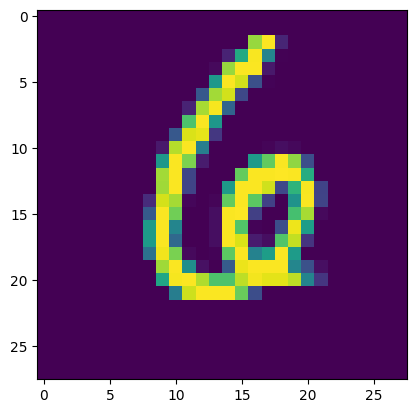

In [50]:
test_dataset = datasets.MNIST("./data", train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

idx = 123

plt.imshow(test_dataset.data[idx])
model(test_dataset.data[idx].float().view(1, -1)).argmax()

In [75]:
correct = 0
total = 0
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
with torch.no_grad():
    for data_batch, target_batch in test_loader:
        predicted = model(data_batch.view(-1, input_size)).argmax(dim=1)
        correct += (predicted == target_batch).sum()
        total += predicted.shape[0]

(correct / total) * 100

tensor(98.1000)